<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
# !pip install scikit-learn==1.1.3

In [2]:
import pandas as pd
import sklearn as sk
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

# from sklearn.metrics import f1_score
# from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, roc_auc_score, recall_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

Посмотрим, какие значения в строках, сколько строк, пропуски и т.д.

In [3]:
df = pd.read_csv('./datasets/Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Я считаю, что первые 3 строки(RowNumber, CustomerId, Surname) можно выбросить, потому что они на целевой признак влиять не должны. 

In [5]:
# видим диапазон значений для колонки с пропусками
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [6]:
df[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


Пропущенные значения в Tenure:  

    1) можно сделать как отдельный класс      
    2) можно залить нулями, но значения с нулями уже есть.  
    
    
Я попробую 1 вариант. Учитывая, что других переменных с пропущенными значениями нет, можно его себе такое позволить.

In [7]:
# отбрасываем колонки, которые хотел отбросить
df = df.drop(['RowNumber', "CustomerId", "Surname"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Исследование задачи

Тут была попытка посмотреть на зависимости в данных.

Text(0.5, 1.0, 'Тепловая карта корреляции переменных датасета')

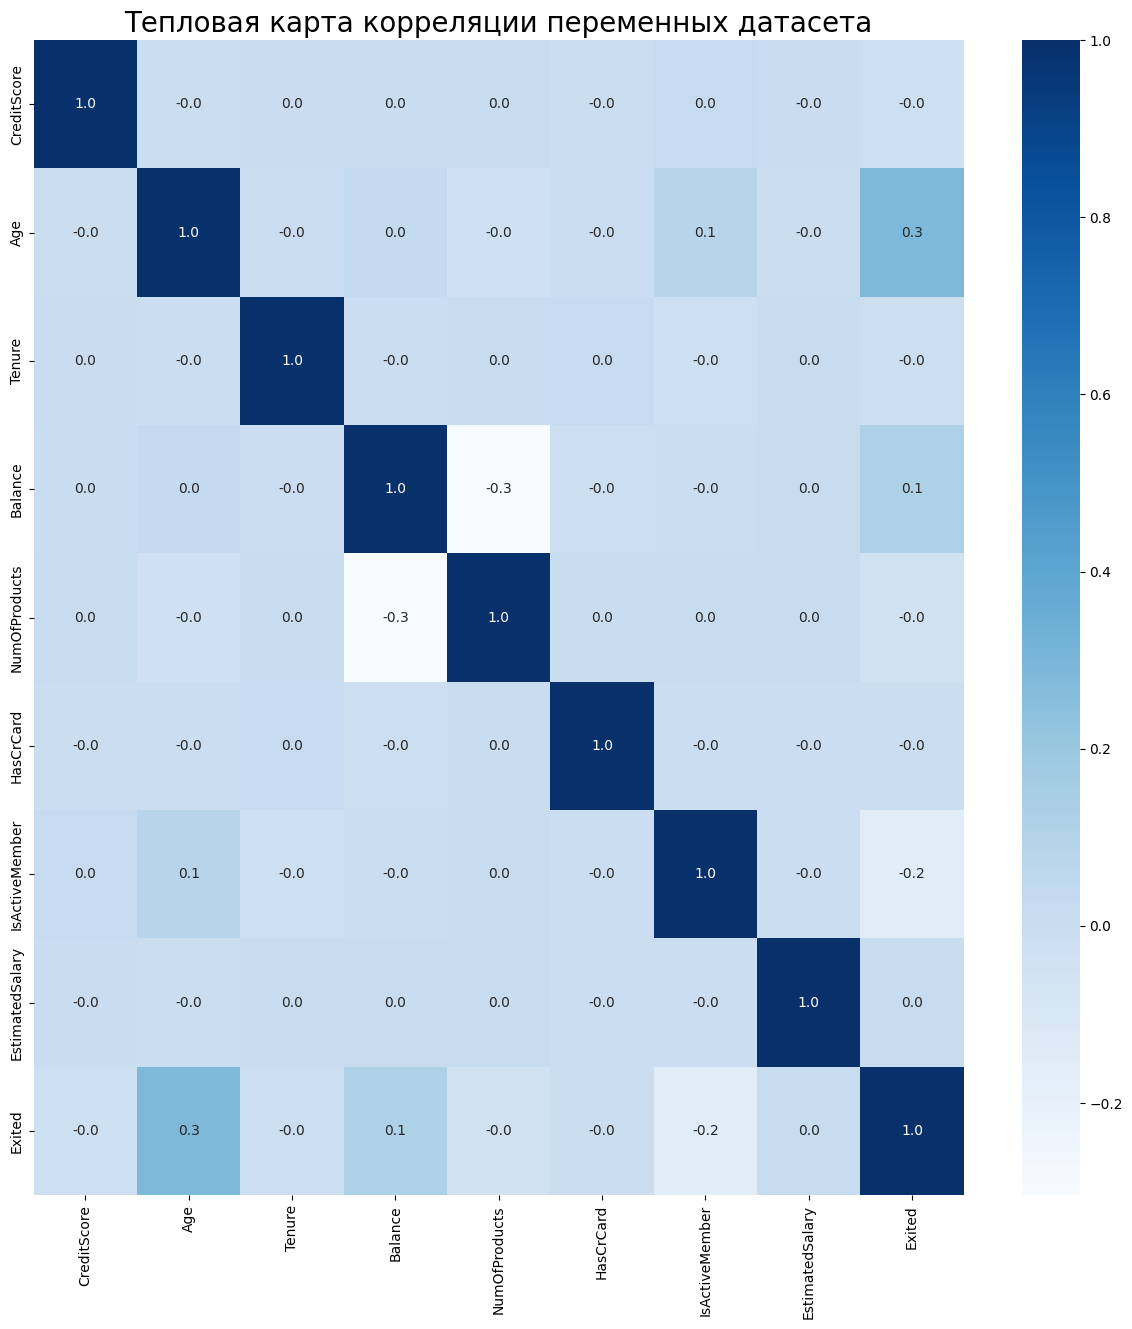

In [8]:
# import seaborn as sb
# import matplotlib.pyplot as plt


corr = df.corr()
plt.figure(figsize = (15,15))

sb.heatmap(corr, cmap="Blues", annot=True,  fmt=".1f")
plt.title('Тепловая карта корреляции переменных датасета', fontsize = 20)

Text(0.5, 0.98, 'Матрица диаграмм рассеяния датасета')

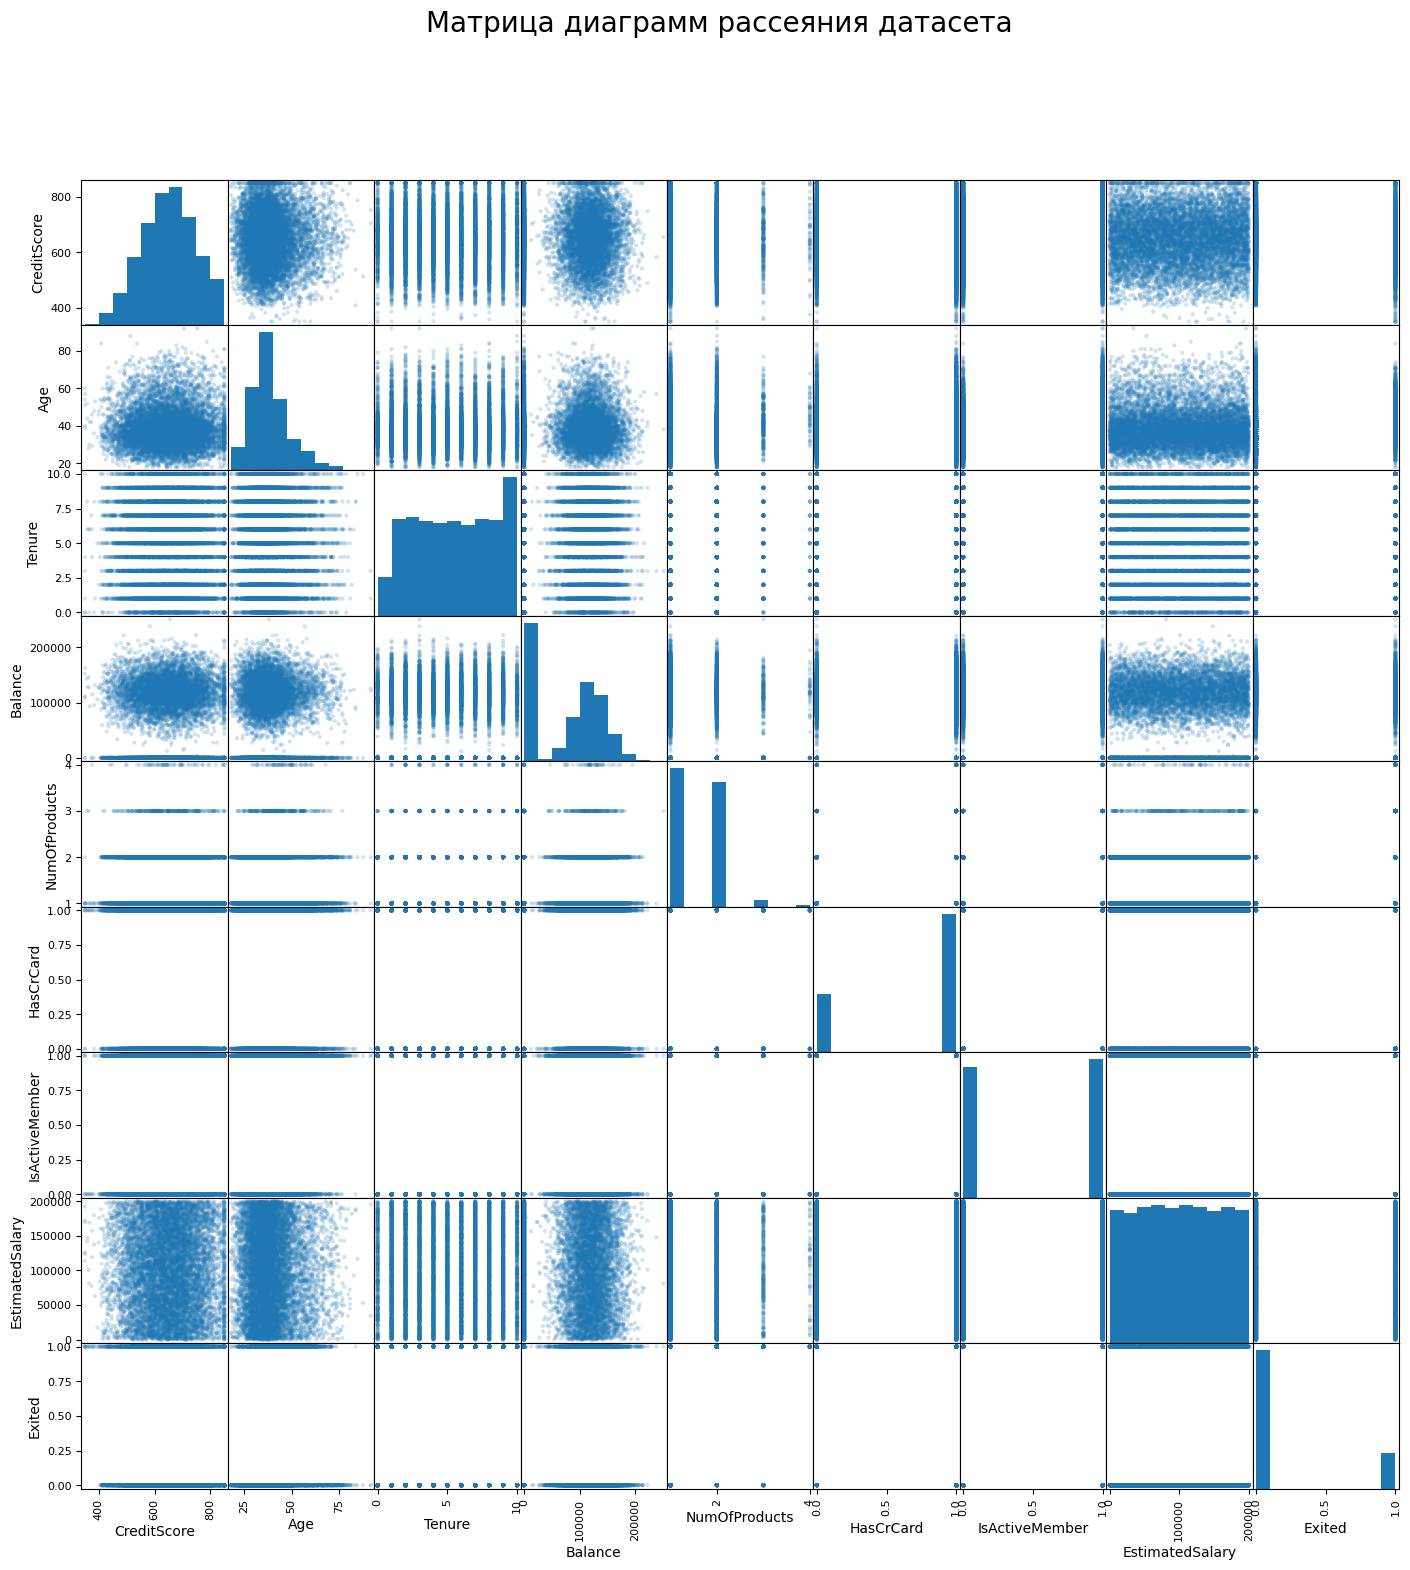

In [9]:
_ = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(17,17))
plt.suptitle('Матрица диаграмм рассеяния датасета', fontsize = 20)

для меня более информативным оказался heatmap. Видим что целевой немного корелирует с 'Age', 'Balance', 'IsActiveMember'.

In [10]:
# тут увидили, что у нас всего 3 страны. Это хорошо, потому что будет на так много классов
df.groupby('Geography').sum()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,3257437,193098,25093,3.113325e+08,7676,3543,2591,5.008945e+08,810
Germany,1634497,99787,12570,3.004029e+08,3813,1791,1248,2.536936e+08,814
Spain,1613354,96333,12465,1.531236e+08,3813,1721,1312,2.463143e+08,413


In [11]:
# преобразуем классы 
# df = pd.get_dummies (df, columns=['Tenure', 'Gender','Geography'], drop_first= True )
# df.shape

In [12]:
# проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
# делим на признаки и целевой признак
target = df['Exited']
features = df.drop('Exited', axis = 1)
target.shape, features.shape

((10000,), (10000, 10))

In [14]:
# разбиваем данные
# X_train, X_test, y_train, y_test = train_test_split(features,target , test_size=0.15,
#                                     random_state=0, shuffle=True)

X_train, X_val, Y_train, Y_val = train_test_split(features,target , test_size=0.25,
                                    random_state=0, shuffle=True)

X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val , test_size=0.4,
                                    random_state=0, shuffle=True)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((7500, 10), (7500,), (1500, 10), (1500,), (1000, 10), (1000,))

<br/>
<div class="alert alert-info">
Здесь обучаем 2 энкодера: для категориальных и численных признаков и используем их
</div>

In [15]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [16]:
# обучаем енкодер для категориальных признаков, в нашем случае это 'Geography', 'Gender'
encoder_ohe.fit(X_train[['Geography', 'Gender', 'Tenure']])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [17]:
X_train[encoder_ohe.get_feature_names_out()] = \
encoder_ohe.transform(X_train[['Geography', 'Gender', 'Tenure']])

X_val[encoder_ohe.get_feature_names_out()] = \
encoder_ohe.transform(X_val[['Geography', 'Gender', 'Tenure']])

X_test[encoder_ohe.get_feature_names_out()] = \
encoder_ohe.transform(X_test[['Geography', 'Gender', 'Tenure']])

In [18]:
X_train = X_train.drop(['Geography', 'Gender', 'Tenure'], axis=1)
X_val = X_val.drop(['Geography', 'Gender', 'Tenure'], axis=1)
X_test = X_test.drop(['Geography', 'Gender', 'Tenure'], axis=1)

X_train.shape, X_val.shape, X_test.shape

((7500, 20), (1500, 20), (1000, 20))

In [19]:
# features.columns

In [20]:
categ_feat = ['CreditScore', 'Age', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [21]:
scaler = StandardScaler()

In [22]:
X_train[categ_feat] = scaler.fit_transform(X_train[categ_feat])
X_val[categ_feat] = scaler.transform(X_val[categ_feat])
X_test[categ_feat] = scaler.transform(X_test[categ_feat])
X_train

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10
2967,-0.735507,0.015266,0.673160,2.535034,-1.553624,-1.034460,-1.640810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
700,1.024427,-0.652609,-1.207724,0.804242,0.643657,-1.034460,-0.079272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3481,0.808295,-0.461788,-0.356937,0.804242,0.643657,0.966688,-0.996840,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1621,0.396614,-0.080145,-0.009356,-0.926551,0.643657,0.966688,-1.591746,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
800,-0.467915,1.255605,-1.207724,0.804242,0.643657,0.966688,1.283302,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,-0.581127,-0.652609,0.708942,0.804242,0.643657,0.966688,1.092143,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4859,1.477276,-1.606716,0.618999,-0.926551,0.643657,0.966688,0.131906,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,0.900923,-0.366377,1.366572,0.804242,0.643657,-1.034460,1.413355,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9845,-0.622295,-0.080145,-1.207724,0.804242,0.643657,0.966688,0.844962,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# # сначала подбираем глубину дерева

# for max_depth in range(1,16,1):
#     print(max_depth)
#     model = RandomForestClassifier(n_estimators=50, max_depth=max_depth, random_state=0)
#     model.fit(X_train, Y_train)
    
#     pred = model.predict(X_val)
#     prob = model.predict_proba(X_val)
      
#     print(f1_score(Y_val, pred))
#     print(roc_auc_score(Y_val, prob[:, 1]))
#     print('--------------------')

In [24]:
# # выбрали max_depth = 12
# # Теперь количество деревьев


# for n_est in range(10,200,10):
#     print(n_est)
#     model = RandomForestClassifier(n_estimators=n_est, max_depth=3, random_state=0)
#     model.fit(X_train, Y_train)
    
#     pred = model.predict(X_val)
#     prob = model.predict_proba(X_val)
      
#     print(f1_score(Y_val, pred))
#     print(roc_auc_score(Y_val, prob[:, 1]))
#     print('--------------------')


In [25]:
best_model = None
best_f1 = 0
best_Roc = 0
best_depth = 0
best_n_est = 0


for est in range(10, 101, 10):
    for depth in range(1, 14, 2):
        
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=0)
        model.fit(X_train, Y_train)

        pred = model.predict(X_val)
        prob = model.predict_proba(X_val)

        f1 = f1_score(Y_val, pred)

        if best_f1 < f1:

            best_f1 = f1
            best_Roc = roc_auc_score(Y_val, prob[:, 1])
            best_model = model

            best_depth = depth
            best_n_est = est

print('best_f1',best_f1)
print('best_Roc',best_Roc)
print('best_depth :', best_depth, 'best_n_est :',best_n_est)

best_f1 0.6094069529652352
best_Roc 0.8610846996650044
best_depth : 13 best_n_est : 40


In [26]:
# тут видим, что желаемый результат не достигнут, поэтому попробовал регрессиию

model = LogisticRegression( random_state=0)
model.fit(X_train, Y_train)

pred = model.predict(X_val)
prob = model.predict_proba(X_val)

print(f1_score(Y_val, pred))
print(roc_auc_score(Y_val, prob[:, 1]))


0.33175355450236965
0.7600084025251799


<br/>
<div class="alert alert-info">
Что творит грамотная предобработка признаков!
</div>

С регрессией еще хуже. Попробуем устранить дисбаланс в классах

## Борьба с дисбалансом

In [27]:
# тут смотрим на дисбаланс классов, отношение 1/4
df[df['Exited']==0].shape, df[df['Exited']==1].shape

((7963, 11), (2037, 11))

In [28]:
# решил просто продублировать недостаяющие данные 4 раза. Как окажется далее, этого будет достаточно

def upsample(featurers, target, k = 4):
    f_0 = featurers[target == 0]
    f_1 = featurers[target == 1]
    t_0 = target[target == 0]
    t_1 = target[target == 1]
    
    t_1 = t_1.loc[t_1.index.repeat(k)]
    f_1 = f_1.loc[f_1.index.repeat(k)]
    
    featurers_new = pd.concat([f_0, f_1], ignore_index=True)
    target_new = pd.concat([t_0, t_1], ignore_index=True)
    
    featurers_new, target_new = shuffle(featurers_new, target_new, random_state=0)

    
    return featurers_new, target_new

In [29]:
# проверяем, размерность. Вроде все нормально (2к*4 + 8 = 16)
# features_ups, target_ups = upsample(features, target)
# features_ups.shape, target_ups.shape
X_train_u, Y_train_u = upsample(X_train, Y_train)
X_train_u.shape, Y_train_u.shape

((12084, 20), (12084,))

In [30]:
# Тут уже по человечески дели на train, test и val и пробуем обучить случайный лес с ранее подобранными параметрами

# X_train_ups, X_test_ups, y_train_ups, y_test_ups = \
#             train_test_split(features_ups, target_ups , test_size=0.25, random_state=0, shuffle=True)

# X_val_ups, X_test_ups, y_val_ups, y_test_ups = \
#             train_test_split(X_test_ups, y_test_ups , test_size=0.4, random_state=0, shuffle=True)

# model = RandomForestClassifier(n_estimators=10, max_depth=12, random_state=0)

# model.fit(X_train_u, Y_train_u)

# pred = model.predict(X_val)
# prob = model.predict_proba(X_val)

# print(f1_score(Y_val, pred))
# print(roc_auc_score(Y_val, prob[:, 1]))

In [31]:
# Видим, что результат намного лучше, в принципе цель достигнута. Решил подобрать наилучшую модель уже на последних данных

Forest_up = None
best_f1 = 0
best_Roc = 0
best_depth = 0
best_n_est = 0

for max_depth in range(1,16,1):
    for n_est in range(10,200,10): 
        
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=0)
        model.fit(X_train_u, Y_train_u)

        pred = model.predict(X_val)
        prob = model.predict_proba(X_val)

        f1 = f1_score(Y_val, pred)

        if best_f1 < f1:

            best_f1 = f1
            best_Roc = roc_auc_score(Y_val, prob[:, 1])
            Forest_up = model

            best_depth = depth
            best_n_est = est

print('best_f1',best_f1)
print('best_Roc',best_Roc)
print('best_depth :', best_depth, 'best_n_est :',best_n_est)

best_f1 0.6293494704992435
best_Roc 0.8626325332507822
best_depth : 13 best_n_est : 100


In [32]:
# видим еще боле высокий результат, решил глянуть что покажет неблагоплучная регрессия

Reg_up = LogisticRegression( random_state=0)
Reg_up.fit(X_train_u, Y_train_u)

pred = Reg_up.predict(X_val)
prob = Reg_up.predict_proba(X_val)

print(f1_score(Y_val, pred))
print(roc_auc_score(Y_val, prob[:, 1]))

0.48275862068965514
0.7642787648287985


Видим, что регрессия уже и не такая неблагополучная. Ниже просто проверил на тестовых данных регрессию и лес

In [33]:
# Видим, что результат намного лучше, в принципе цель достигнута. Решил подобрать наилучшую модель уже на последних данных

Forest_bln = None
best_f1 = 0
best_Roc = 0
best_depth = 0
best_n_est = 0

for max_depth in range(1,16,1):
    for n_est in range(10,200,10): 
        
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=0, class_weight='balanced')
        model.fit(X_train, Y_train)

        pred = model.predict(X_val)
        prob = model.predict_proba(X_val)

        f1 = f1_score(Y_val, pred)

        if best_f1 < f1:

            best_f1 = f1
            best_Roc = roc_auc_score(Y_val, prob[:, 1])
            Forest_bln = model

            best_depth = depth
            best_n_est = est

print('best_f1',best_f1)
print('best_Roc',best_Roc)
print('best_depth :', best_depth, 'best_n_est :',best_n_est)

best_f1 0.6271186440677966
best_Roc 0.85998739621223
best_depth : 13 best_n_est : 100


In [34]:
Reg_bln = LogisticRegression( random_state=0, class_weight='balanced')
Reg_bln.fit(X_train, Y_train)

pred = Reg_bln.predict(X_val)
prob = Reg_bln.predict_proba(X_val)

print(f1_score(Y_val, pred))
print(roc_auc_score(Y_val, prob[:, 1]))

0.4859392575928009
0.7643423365653572


<br/>
<div class="alert alert-info">
Для леса лучшие гиперпараметры best_depth : 13 best_n_est : 100
</div>

## Тестирование модели

In [35]:
# Лес при class_weight='balanced'

pred = Forest_bln.predict(X_test)
prob = Forest_bln.predict_proba(X_test)

print('f1_score', f1_score(Y_test, pred))
print('recall_score', recall_score(Y_test, pred))
print('roc_auc_score', roc_auc_score(Y_test, prob[:, 1]))

f1_score 0.6486486486486487
recall_score 0.6376811594202898
roc_auc_score 0.8853921084854799


In [36]:
# Регрессия при class_weight='balanced'

pred = Reg_bln.predict(X_test)
prob = Reg_bln.predict_proba(X_test)

print('f1_score', f1_score(Y_test, pred))
print('recall_score', recall_score(Y_test, pred))
print('roc_auc_score', roc_auc_score(Y_test, prob[:, 1]))

f1_score 0.5254237288135595
recall_score 0.748792270531401
roc_auc_score 0.7897911069685838


In [37]:
# регрессия при апсемлинге

pred = Reg_up.predict(X_test)
prob = Reg_bln.predict_proba(X_test)

print('f1_score', f1_score(Y_test, pred))
print('recall_score', recall_score(Y_test, pred))
print('roc_auc_score', roc_auc_score(Y_test, prob[:, 1]))

f1_score 0.5226130653266331
recall_score 0.7536231884057971
roc_auc_score 0.7897911069685838


In [38]:
# лес при апсемлинге

pred = Forest_up.predict(X_test)
prob = Forest_up.predict_proba(X_test)

print('f1_score', f1_score(Y_test, pred))
print('recall_score', recall_score(Y_test, pred))
print('roc_auc_score',roc_auc_score(Y_test, prob[:, 1]))

f1_score 0.6593406593406593
recall_score 0.7246376811594203
roc_auc_score 0.8860500392930898


In [39]:
# случайная модель

dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(X_train, Y_train)

print('f1_score',     f1_score(dummy_model.predict(X_test), Y_test))
print('recall_score', recall_score(dummy_model.predict(X_test), Y_test))

f1_score 0.3429991714995857
recall_score 0.207


<br/>
<div class="alert alert-info">
    
Лучшей моделью является случайный лес, обученный при следующих гиперпараметрах: class_weight='balanced', best_depth : 13 best_n_est : 100. Значения метрик f1 = 0.62, recall = 0.58, ROC AUC = 0.86. Модель, всегда предсказывающая 1 класс, показывает recall = 0.208. Детектируемая доля клиентов на отток: 0.58.
</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

Вывод  

1. Снала попробовали пообучать на данных регрессию и лес. Получили следующие результаты:  
    Лес: F1 : 0.55, AUC-ROC : 0.69  
    Регрессия: F1 : 0.08, AUC-ROC : 0.51  
      
      
2. Попробовали устранить дисбаланс в данных, продублировав недостающие данные 4 раза и получили следующие результаты на валидационной выборке:  

    Лес: F1 : 0.93, AUC-ROC : 0.93  
    Регрессия: F1 : 0.67, AUC-ROC : 0.66
    
3.На тестовых данных для полученных моделей были полученны следующие результаты:  

    Лес: F1 : 0.93, AUC-ROC : 0.92  
    Регрессия: F1 : 0.66, AUC-ROC : 0.65

